# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime as dt
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = city_weather_json["name"] 
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
            
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | stralsund
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | henties bay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ballyshannon
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | marovoay
Processing Record 12 of Set 1 | saint-joseph
Processing Record 13 of Set 1 | verkhoyansk
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kingsville
Processing Record 20 of Set 1 | datong
Processing Record 21 of Set 1 | deep river
Processing Record 22 

Processing Record 37 of Set 4 | terrace
Processing Record 38 of Set 4 | basar
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | haines junction
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | saint-georges
Processing Record 43 of Set 4 | kodinsk
Processing Record 44 of Set 4 | kibala
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | leningradskiy
Processing Record 47 of Set 4 | morros
Processing Record 48 of Set 4 | brae
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | oussouye
Processing Record 1 of Set 5 | pacifica
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | nyagan
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | beisfjord
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | ixhuatan
Processing Record 9 of Set 5 | salinopolis
Processing Record 10 of Set 5 | burica
City not found

Processing Record 27 of Set 8 | zhaotong
Processing Record 28 of Set 8 | riyadh
Processing Record 29 of Set 8 | teeli
Processing Record 30 of Set 8 | mbekenyera
Processing Record 31 of Set 8 | tarnobrzeg
Processing Record 32 of Set 8 | mabaruma
Processing Record 33 of Set 8 | toliary
City not found. Skipping...
Processing Record 34 of Set 8 | hervey bay
Processing Record 35 of Set 8 | talaya
Processing Record 36 of Set 8 | georgetown
Processing Record 37 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 8 | gushikawa
Processing Record 39 of Set 8 | prince rupert
Processing Record 40 of Set 8 | mayumba
Processing Record 41 of Set 8 | villamontes
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | palembang
Processing Record 44 of Set 8 | taoudenni
Processing Record 45 of Set 8 | brigantine
Processing Record 46 of Set 8 | matara
Processing Record 47 of Set 8 | burgess hill
Processing Record 48 of Set 8 | huron
Processing Record 49 of Set 8 | 

Processing Record 13 of Set 12 | yei
Processing Record 14 of Set 12 | varkkallai
Processing Record 15 of Set 12 | mackay
Processing Record 16 of Set 12 | dunedin
Processing Record 17 of Set 12 | pangnirtung
Processing Record 18 of Set 12 | mukhen
Processing Record 19 of Set 12 | praia da vitoria
Processing Record 20 of Set 12 | alexandria
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | banda aceh
Processing Record 23 of Set 12 | merke
Processing Record 24 of Set 12 | lensk
Processing Record 25 of Set 12 | casimiro de abreu
Processing Record 26 of Set 12 | gigmoto
Processing Record 27 of Set 12 | deloraine
Processing Record 28 of Set 12 | leh
Processing Record 29 of Set 12 | pisco
Processing Record 30 of Set 12 | prince george
Processing Record 31 of Set 12 | yar-sale
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | ajdabiya
Processing Record 34 of Set 12 | scarborough
Processing Record 35 of Set 12 | samarai
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0        Pevek  69.7008  170.3133    -32.20       100         100        0.94   
1    Stralsund  54.3091   13.0818      3.34        58          40        3.58   
2       Atuona  -9.8000 -139.0333     25.88        74          16        8.18   
3  Henties Bay -22.1160   14.2845     21.52        72          66        5.12   
4      Ushuaia -54.8000  -68.3000      9.81        62          40        6.69   

  Country        Date  
0      RU  1675779131  
1      DE  1675779131  
2      PF  1675779132  
3      NA  1675779132  
4      AR  1675778581

In [6]:
city_data_df = city_data_df.rename(columns={"Lat":"Latitude","Lng":"Longitude"})

city_data_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
0        Pevek   69.7008   170.3133    -32.20       100         100   
1    Stralsund   54.3091    13.0818      3.34        58          40   
2       Atuona   -9.8000  -139.0333     25.88        74          16   
3  Henties Bay  -22.1160    14.2845     21.52        72          66   
4      Ushuaia  -54.8000   -68.3000      9.81        62          40   

   Wind Speed Country        Date  
0        0.94      RU  1675779131  
1        3.58      DE  1675779131  
2        8.18      PF  1675779132  
3        5.12      NA  1675779132  
4        6.69      AR  1675778581

In [7]:
# converting timestamp to date format and assigning value to chart title 

date = city_data_df["Date"]
date = pd.to_datetime(date, unit="s")
date_format = date.dt.date
city_data_df["Date"] = date_format


In [8]:
title_date = date_format[0].strftime("%Y-%m-%d")

In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
0              Pevek   69.7008   170.3133    -32.20       100         100   
1          Stralsund   54.3091    13.0818      3.34        58          40   
2             Atuona   -9.8000  -139.0333     25.88        74          16   
3        Henties Bay  -22.1160    14.2845     21.52        72          66   
4            Ushuaia  -54.8000   -68.3000      9.81        62          40   

         Wind Speed Country        Date  
City_ID                                  
0              0.94      RU  2023-02-07  
1              3.58      DE  2023-02-07  
2              8.18      PF  2023-02-07  
3              5.12     NaN  2023-02-07  
4              6.69      AR  2023-02-07

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

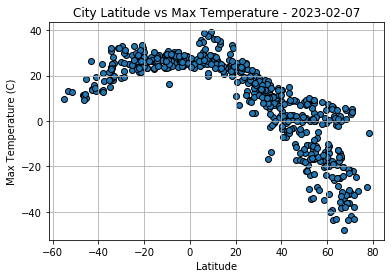

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title(f"City Latitude vs Max Temperature - {title_date}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

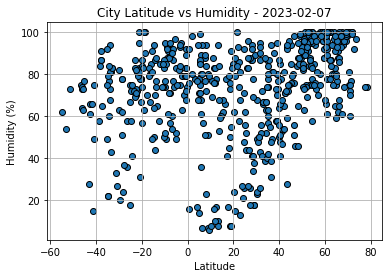

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f"City Latitude vs Humidity - {title_date}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

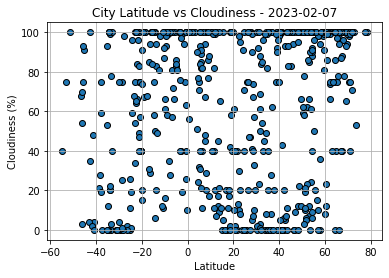

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f"City Latitude vs Cloudiness - {title_date}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

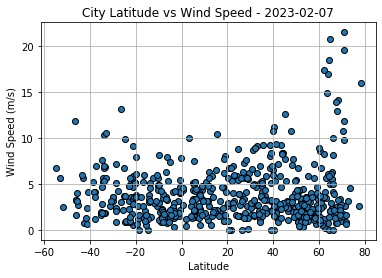

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title(f"City Latitude vs Wind Speed - {title_date}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel (x_values.name)
    plt.ylabel (y_values.name)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"]>=0),:]

# Display sample data

northern_hemi_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0               Pevek   69.7008   170.3133    -32.20       100         100   
1           Stralsund   54.3091    13.0818      3.34        58          40   
5        Ballyshannon   54.5000    -8.1833      7.92        78          88   
11        Verkhoyansk   67.5447   133.3850    -47.89       100          88   
12              Vardø   70.3705    31.1107      2.99        81          75   

         Wind Speed Country        Date  
City_ID                                  
0              0.94      RU  2023-02-07  
1              3.58      DE  2023-02-07  
5              2.48      IE  2023-02-07  
11             0.70      RU  2023-02-07  
12            10.80      NO  2023-02-07

In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"]<0),:]

# Display sample data

southern_hemi_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
2             Atuona   -9.8000  -139.0333     25.88        74          16   
3        Henties Bay  -22.1160    14.2845     21.52        72          66   
4            Ushuaia  -54.8000   -68.3000      9.81        62          40   
6         Bredasdorp  -34.5322    20.0403     23.77        60         100   
7         Vila Velha  -20.3297   -40.2925     31.97        67          40   

         Wind Speed Country        Date  
City_ID                                  
2              8.18      PF  2023-02-07  
3              5.12     NaN  2023-02-07  
4              6.69      AR  2023-02-07  
6              5.68      ZA  2023-02-07  
7              5.14      BR  2023-02-07

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7294269914046874


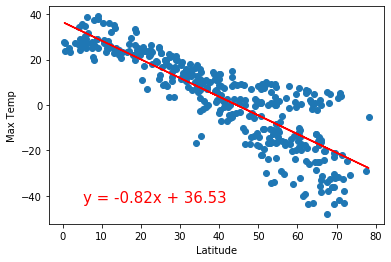

In [47]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-squared is: 0.3842446126967004


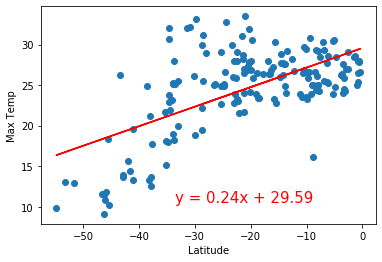

In [48]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** 

When analysing the relationship between latitude and max tempuratures for cities on the Northern Hemisphere, there is a strong negative correlation (r = 0.72): max temperature drops as the latitude increases. 

On the other hand, there is a week positive correlation between the same two variables on the Southern Hemisphere (r = 0.38). The reason for that may be the influence of other variables, such as the altitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.20810946508300499


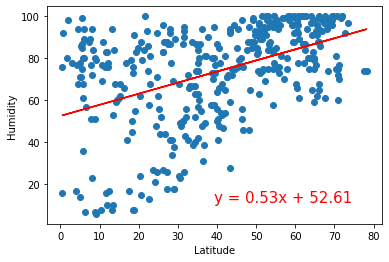

In [49]:
# Northern Hemisphere

x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]

linear_regression(x_values, y_values, 0.5, 0.1)

The r-squared is: 0.09432810573481276


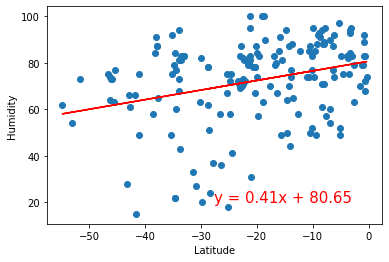

In [50]:
# Southern Hemisphere

x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** 

When analysing the relationship between latitude and humidity for cities on the Northern Hemisphere, it is possible to notice a very week positive correlation (r = 0.20), while there is no correlation at all (r = 0.09) between the same variables for cities located on Southern Hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05924492983845572


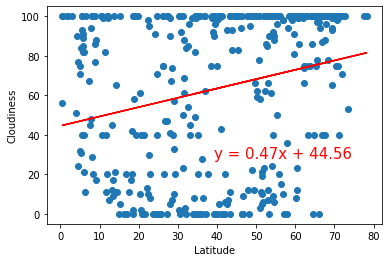

In [51]:
# Northern Hemisphere

x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.5, 0.3)

The r-squared is: 0.13103056846894195


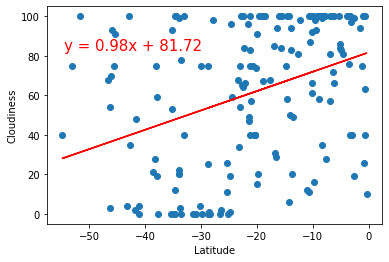

In [52]:
# Southern Hemisphere

x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:** 

There is no correlation between Latitude and Cloudiness for cities on both hemispheres (r < 0.3). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009859204960368224


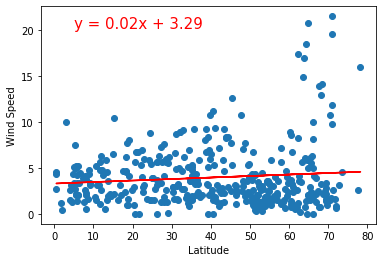

In [53]:
# Northern Hemisphere

x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values)

The r-squared is: 0.036125222162621456


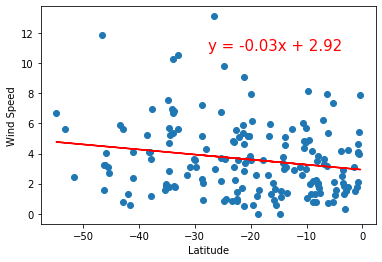

In [54]:
# Southern Hemisphere

x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** 

There is no correlation between Latitude and Wind Speed for cities on both hemispheres (r < 0.3). 